* **말뭉치**는 자연어 처리에서 사용하는 텍스트 데이터의 모음, 즉 훈련 데이터셋을 의미한다. 
* **토큰**은 텍스트에서 공백으로 구분되는 문자열을 말한다. 종종 소문자로 변환하고 구둣점은 삭제한다. 
* **원-핫 인코딩**은 어떤 클래스에 해당하는 원소만 1이고 나머지는 모두 0인 벡터이다. 정수로 변환된 토큰을 원-핫 인코딩으로 변환하려면 어휘 사전 크기의 백터가 만들어진다. 
* **단어 임베딩**은 정수로 변환된 비교적 작은 크기의 실수 밀집 벡터로 변환한다. 이런 밀집 벡터는 단어 사이의 관계를 표현할 수 있기 때문에 자연어 처리에서 좋은 성능을 발휘한다. 

# Tensorflow

* **pad_sequences()**는 시퀀스 길이를 맞추기 위해 패딩을 추가한다. 이 함수는 (샘플 개수, 타임 스텝 개수) 크기의 2차원 배열을 기대한다. 
  * maxlen 매개변수로 원하는 시퀀스 길이를 지정할 수 있다. 이 값보다 긴 시퀀스는 잘리고 짧은 시퀀스는 패딩된다. 이 매개변수를 지정하지 않으면 가장 긴 시퀀스의 길이가 된다. 
  * padding 매개변수는 패딩을 추가할 위치를 지정한다. 기본값인 'pre'는 시퀀스 앞에 패딩을 추가하고 'post'는 시퀀스 뒤에 패딩을 추가한다. 
  * truncating 매개변수는 긴 시퀀에서 자를 위치를 지정한다. 기본값인 'pre'는 시퀀스 앞부분을 잘라내고 'post'는 시퀀스 뒷부분을 잘라낸다. 

* **to_categorical()**은 정수 시퀀스를 원-핫 인코딩으로 변환한다. 토큰을 원-핫 인코딩하거나 타깃값을 원-핫 인코딩할 때 사용한다. 
  * num_classes 매개변수에서 클래스 개수를 지정할 수 있다. 지정하지 않으면 데이터에서 자동으로 찾는다. 

* **SimpleRNN**은 케라스의 기본 순환층 클래스이다. 
  * 첫 번째 매개변수에 뉴런의 개수를 지정한다. 
  * activation 매개변수에서 활성화 함수를 지정한다. 기본값은 하이퍼볼릭 탄젠트인 'tanh'이다. 
  * dropout 매개변수에서 입력에 대한 드롭아웃 비율을 지정할 수 있다. 
  * return_sequences 매개변수에서 모든 타임스텝의 은닉 상태를 출력할지 결정한다. 기본값은 False이다. 

* **Embedding**은 단어 임베딩을 위한 클래스이다. 
  * 첫 번째 매개변수에서 어휘 사전의 크기를 지정한다. 
  * 두 번째 매개변수에서 Embedding 층이 출력할 밀집 벡터의 크기를 지정한다. 
  * input_length 매개변수에서 입력 시퀀스의 길이를 지정한다. 이 매개변수는 Embedding 층 바로 뒤에 Flatten이나 Dense 클래스가 올 때 꼭 필요하다. 

In [1]:
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=300)

print(train_input.shape, test_input.shape)

17464789/17464789 [==============================] - 1s 0us/step
(25000,) (25000,)


In [3]:
print(len(train_input[1]))

189


In [4]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 284, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [5]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [6]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [7]:
import numpy as np

lengths = np.array([len(x) for x in train_input])

In [8]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


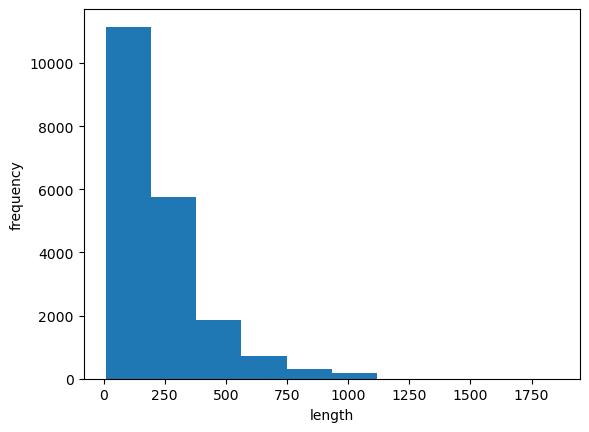

In [9]:
import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [10]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)

In [11]:
print(train_seq.shape)

(20000, 100)


In [12]:
print(train_seq[0])

[ 10   4  20   9   2   2   2   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10   2   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10   2 158]


In [13]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 2, 158]


In [15]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2   2   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94   2   2   2   2  11 190
  24   2   2   7  94 205   2  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [16]:
val_seq = pad_sequences(val_input, maxlen=100)

In [18]:
from tensorflow import keras

model = keras.models.Sequential()

model.add(keras.layers.SimpleRNN(8, input_shape=(100, 300)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [23]:
train_oh = keras.utils.to_categorical(train_seq)

In [26]:
print(train_oh.shape)

(20000, 100, 300)


In [25]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [27]:
print(np.sum(train_oh[0][0]))

1.0


In [28]:
val_oh = keras.utils.to_categorical(val_seq)

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 2472      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 2,481
Trainable params: 2,481
Non-trainable params: 0
_________________________________________________________________


In [30]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 23s 61ms/step - loss: 0.7049 - accuracy: 0.4976 - val_loss: 0.6992 - val_accuracy: 0.5012
Epoch 2/100
313/313 [==============================] - 18s 58ms/step - loss: 0.6977 - accuracy: 0.5124 - val_loss: 0.6943 - val_accuracy: 0.5198
Epoch 3/100
313/313 [==============================] - 20s 64ms/step - loss: 0.6920 - accuracy: 0.5308 - val_loss: 0.6881 - val_accuracy: 0.5408
Epoch 4/100
313/313 [==============================] - 20s 64ms/step - loss: 0.6776 - accuracy: 0.5754 - val_loss: 0.6686 - val_accuracy: 0.6006
Epoch 5/100
313/313 [==============================] - 20s 63ms/step - loss: 0.6589 - accuracy: 0.6178 - val_loss: 0.6570 - val_accuracy: 0.6232
Epoch 6/100
313/313 [==============================] - 20s 64ms/step - loss: 0.6456 - accuracy: 0.6404 - val_loss: 0.6406 - val_accuracy: 0.6526
Epoch 7/100
313/313 [==============================] - 19s 61ms/step - loss: 0.6325 - accuracy: 0.6623 - val_loss: 0.6281 - val_ac

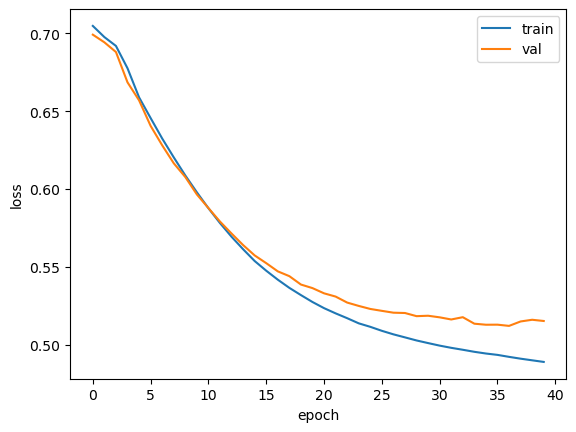

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [32]:
print(train_seq.nbytes, train_oh.nbytes)

8000000 2400000000


In [33]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Embedding(300, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [34]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           4800      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 5,009
Trainable params: 5,009
Non-trainable params: 0
_________________________________________________________________


In [35]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)

model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 26s 81ms/step - loss: 0.6975 - accuracy: 0.5041 - val_loss: 0.6923 - val_accuracy: 0.5232
Epoch 2/100
313/313 [==============================] - 25s 81ms/step - loss: 0.6887 - accuracy: 0.5408 - val_loss: 0.6798 - val_accuracy: 0.5848
Epoch 3/100
313/313 [==============================] - 27s 86ms/step - loss: 0.6648 - accuracy: 0.6263 - val_loss: 0.6538 - val_accuracy: 0.6434
Epoch 4/100
313/313 [==============================] - 28s 88ms/step - loss: 0.6406 - accuracy: 0.6700 - val_loss: 0.6340 - val_accuracy: 0.6752
Epoch 5/100
313/313 [==============================] - 29s 93ms/step - loss: 0.6236 - accuracy: 0.6915 - val_loss: 0.6179 - val_accuracy: 0.6932
Epoch 6/100
313/313 [==============================] - 29s 92ms/step - loss: 0.6107 - accuracy: 0.7028 - val_loss: 0.6088 - val_accuracy: 0.7002
Epoch 7/100
313/313 [==============================] - 28s 89ms/step - loss: 0.6000 - accuracy: 0.7096 - val_loss: 0.6013 - val_ac

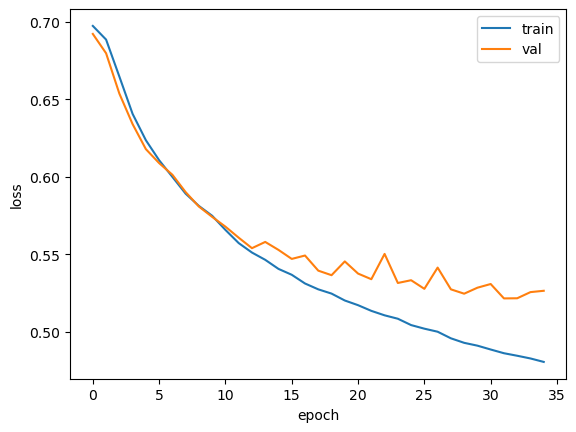

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()